In [1]:
import os, sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [2]:
from scripts.fetchPrepr_close_column import *
from scripts.sarima_model import *
from scripts.lstm_model import *
from scripts.forecasting import *

In [3]:
# Fetch and preprocess data
tsla_data = fetch_data('TSLA', '2015-01-01', '2025-01-31')
train_data, test_data = preprocess_data(tsla_data)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
# Load the trained model (SARIMA or LSTM)
model_type1 = 'sarima'

if model_type1 == 'sarima':
    sarima_model = load_sarima_model('sarima_model.pkl')
    forecast_valuesS, confidence_intervalsS = sarima_forecast(sarima_model, steps=12)


SARIMA model loaded from sarima_model.pkl


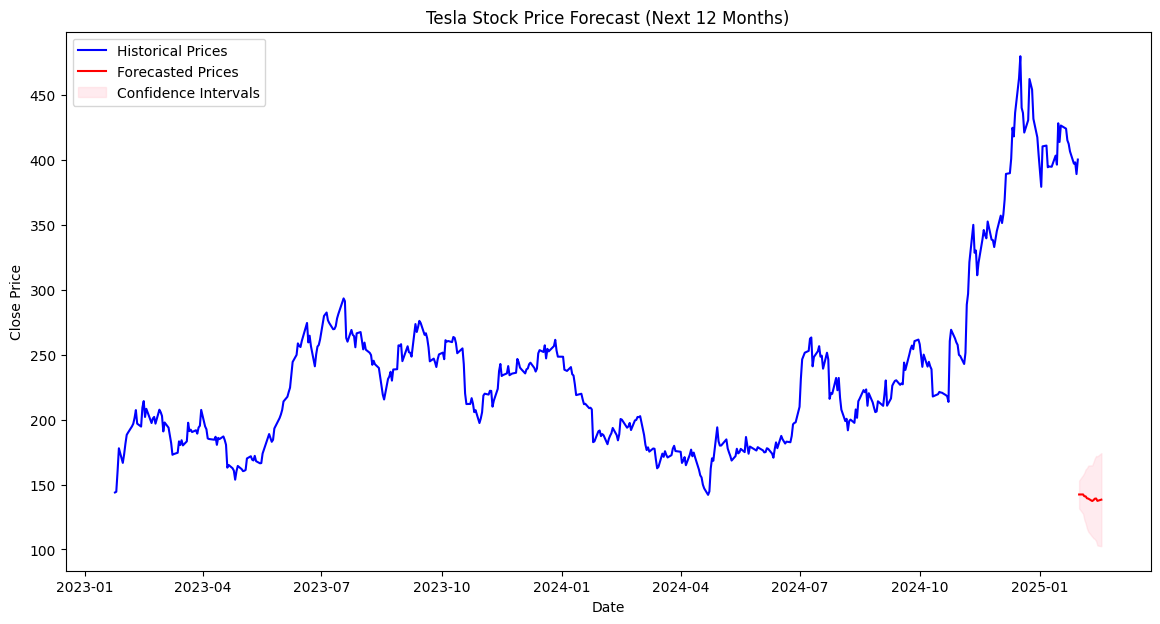

In [8]:
# Visualize the forecast
plot_forecast(test_data['TSLA'], forecast_valuesS, confidence_intervalsS, title="Tesla Stock Price Forecast (Next 12 Months)")

In [4]:
def interpret_forecast(forecast_values, confidence_intervals=None):
    """
    Interpret the forecasted results.
    
    Parameters:
        forecast_values (pd.Series or np.array): Forecasted values.
        confidence_intervals (pd.DataFrame): Confidence intervals for the forecast.
    """
    print("\nForecast Analysis:")
    print("------------------")
    
    # Trend Analysis
    trend = "upward" if forecast_values[-1] > forecast_values[0] else "downward"
    print(f"1. Trend Analysis: The forecast shows a {trend} trend in Tesla's stock prices.")
    
    # Volatility and Risk
    if confidence_intervals is not None:
        volatility = confidence_intervals.iloc[:, 1] - confidence_intervals.iloc[:, 0]
        print(f"2. Volatility and Risk: The confidence intervals indicate moderate volatility, with an average range of ${volatility.mean():.2f}.")
    
    # Market Opportunities and Risks
    if trend == "upward":
        print("3. Market Opportunities and Risks: The forecast suggests potential opportunities for investment due to expected price increases.")
    else:
        print("3. Market Opportunities and Risks: The forecast suggests potential risks due to expected price declines.")

In [10]:
# Interpret the results
interpret_forecast(forecast_valuesS, confidence_intervalsS)


Forecast Analysis:
------------------


KeyError: -1

In [5]:
# Load the trained LSTM model
lstm_model = load_lstm_model('lstm_model.keras')

LSTM model loaded from lstm_model.keras


In [6]:
import joblib

# After fitting the scaler on the training data
scaler_filename = 'scaler.pkl'
joblib.dump(lstm_model, scaler_filename)

['scaler.pkl']

In [ ]:
# Prepare the last sequence for forecasting
lookback = 60
last_sequence = train_data[-lookback:].values.reshape(-1, 1)

# Generate forecasts
forecast_valuesL = lstm_forecast(lstm_model, last_sequence, steps=12, lookback=lookback)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Visualize the forecast
plot_forecast(test_data['TSLA'], forecast_valuesL, title="Tesla Stock Price Forecast (Next 12 Months)")